In [62]:
import pandas as pd

data = {
    'Lambda Mask Total Width': [
        '1/2*Cache Line', '1/2*Cache Line', '1/2*Cache Line', '1/2*Cache Line', '1/2*Cache Line', '1/2*Cache Line', '1/2*Cache Line',
        '1/4*Cache Line', '1/4*Cache Line', '1/4*Cache Line', '1/4*Cache Line', '1/4*Cache Line', '1/4*Cache Line',
        '1/8*Cache Line', '1/8*Cache Line', '1/8*Cache Line', '1/8*Cache Line', '1/8*Cache Line', '1/8*Cache Line',
        '1/16*Cache Line', '1/16*Cache Line', '1/16*Cache Line', '1/16*Cache Line', '1/16*Cache Line', '1/16*Cache Line',
        '1/32*Cache Line', '1/32*Cache Line', '1/32*Cache Line', '1/32*Cache Line', '1/32*Cache Line', '1/32*Cache Line'
    ],
    'Sequence Length': [
        1024, 2048, 2048, 2048, 4096, 4096, 10000,
        1024, 2048, 2048, 2048, 4096, 4096,
        1024, 2048, 2048, 2048, 4096, 4096,
        1024, 2048, 2048, 2048, 4096, 4096,
        1024, 2048, 2048, 2048, 4096, 4096
    ],
    'Enforced Context Limit': [
        512, 1024, 512, 256, 1024, 512, None,
        512, 1024, 512, 256, 1024, 512,
        512, 1024, 512, 256, 1024, 512,
        512, 1024, 512, 256, 1024, 512,
        512, 1024, 512, 256, 1024, 512
    ],
    'Result': [
        'F', 'P', 'P', 'P', '-', 'F', '-',
        'P', 'P', 'P', 'P', 'F', 'F',
        'F', 'F', 'P', 'F', 'F', 'P',
        'F', 'F', 'P', 'P', 'P', 'P',
        'F', 'P', 'P', 'F', 'F', 'F'
    ],
    'Compressed Memory': [
        '18.0 GB', '21.7 GB', '19.8 GB', '18.9 GB', 'OOM', '23.4 GB', 'OOM',
        '17.4 GB', '19.9 GB', '18.9 GB', '18.5 GB', '23.6 GB', '21.8 GB',
        '17.3 GB', '18.9 GB', '18.5 GB', '18.3 GB', '21.6 GB', '20.9 GB',
        '17.2 GB', '18.5 GB', '18.3 GB', '18.2 GB', '21 GB', '20.6 GB',
        '17.1 GB', '18.3 GB', '18.3 GB', '18.2 GB', '20.6 GB', '20.4 GB'
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
df['Compressed Memory'] = df['Compressed Memory'].replace('OOM', None)
df['Compressed Memory'] = df['Compressed Memory'].str.replace(' GB', '').astype(float)  


In [50]:
#df.to_csv('data.csv', index=False)

/var/folders/10/1mjzwyh94j58qssnrtf192b00000gn/T/ipykernel_1414/168685279.py:18: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = df.pivot_table(


<Figure size 1000x600 with 0 Axes>

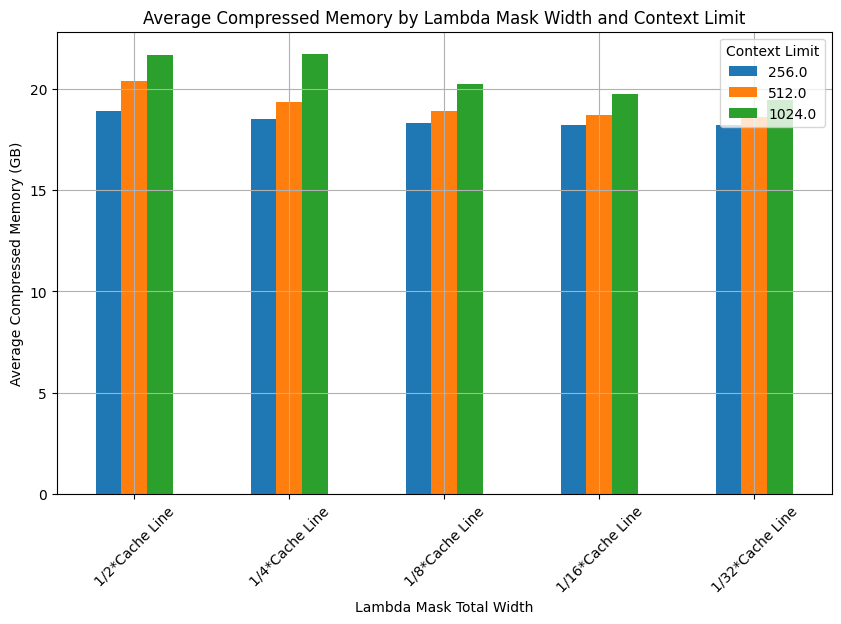

In [75]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot 1: Sequence Length vs Compressed Memory by Enforced Context Limit
plt.figure(figsize=(10, 6))



order = ['1/2*Cache Line', '1/4*Cache Line', '1/8*Cache Line', '1/16*Cache Line', '1/32*Cache Line']
# Set the manual order
df['Lambda Mask Total Width'] = pd.Categorical(
    df['Lambda Mask Total Width'], 
    categories=order, 
    ordered=True)

# Plot 2: Lambda Mask Width vs Average Compressed Memory by Context Limit
pivot_data = df.pivot_table(
    values="Compressed Memory",
    index="Lambda Mask Total Width",
    columns="Enforced Context Limit",
    aggfunc="mean"
)
pivot_data.plot(kind="bar", figsize=(10, 6))
plt.title("Average Compressed Memory by Lambda Mask Width and Context Limit")
plt.xlabel("Lambda Mask Total Width")
plt.ylabel("Average Compressed Memory (GB)")
plt.xticks(rotation=45)
plt.legend(title="Context Limit")
plt.grid()
plt.show()




In [2]:
!pip install matplotlib

  Using cached contourpy-1.3.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.0.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 1.2 MB/s eta 0:00:00a 0:00:010m
Using cached contourpy-1.3.1-cp311-cp311-macosx_11_0_arm64.whl (254 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 2.3 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.7-cp311-cp311-macosx_11_0_arm64.whl (64 kB)
Using cached pillow-11.0.0-cp311-cp311-macosx_11_0_arm64.whl (3.0 MB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


/var/folders/10/1mjzwyh94j58qssnrtf192b00000gn/T/ipykernel_1414/3922196147.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data_updated = filtered_data_updated[
/var/folders/10/1mjzwyh94j58qssnrtf192b00000gn/T/ipykernel_1414/3922196147.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_filtered = filtered_data_updated[filtered_data_updated['Sequence Length'] != 1024].groupby(


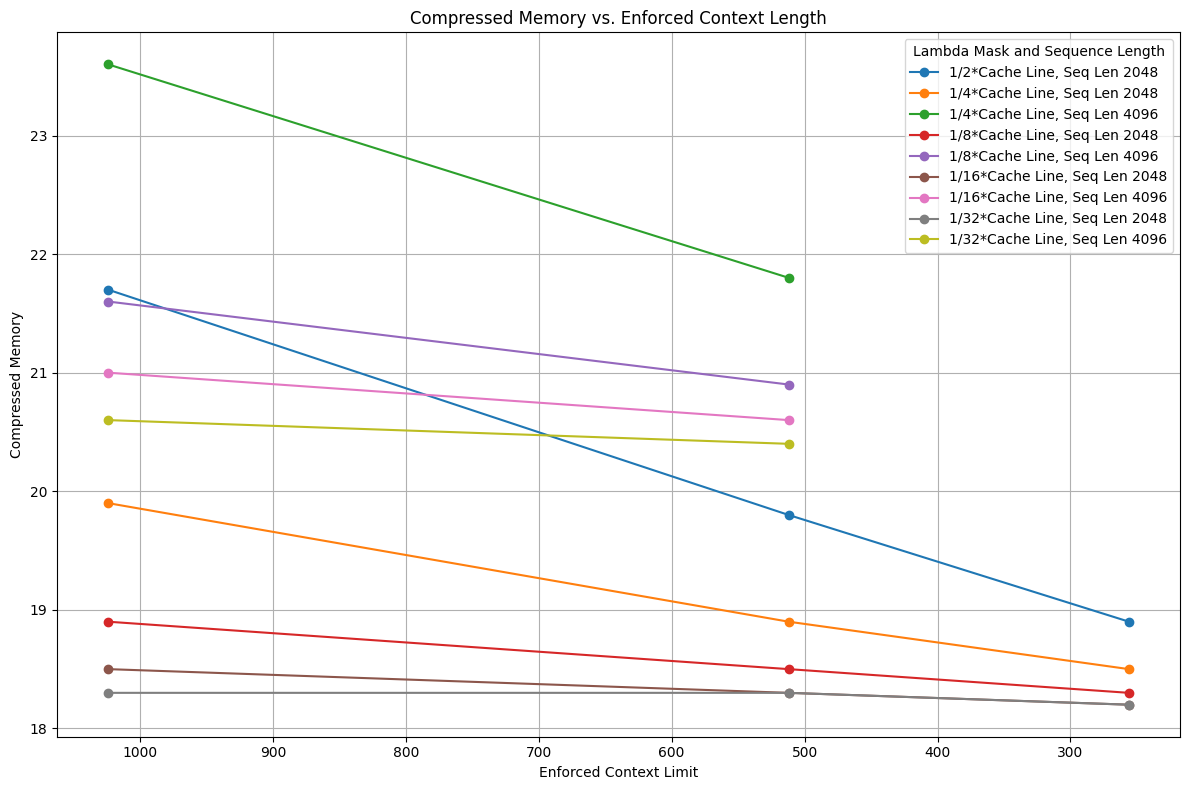

In [76]:
# Plot all Lambda Mask Total Width values in one graph
import matplotlib.pyplot as plt
# Filter out '1/2*Cache Line' with Sequence Length 4096
data = df.copy()
filtered_data_updated = data[
    ~((data['Lambda Mask Total Width'] == '1/2*Cache Line') & (data['Sequence Length'] == 4096))
]

filtered_data_updated = filtered_data_updated[
    ~((filtered_data_updated['Lambda Mask Total Width'] == '1/2*Cache Line') & (data['Sequence Length'] == 10000))
]
# Group data for plotting
grouped_data_filtered = filtered_data_updated[filtered_data_updated['Sequence Length'] != 1024].groupby(
    ['Lambda Mask Total Width', 'Sequence Length']
)

# Plot the filtered data
plt.figure(figsize=(12, 8))
for (mask, seq_len), group in grouped_data_filtered:
    plt.plot(
        group['Enforced Context Limit'], 
        group['Compressed Memory'], 
        marker='o', 
        label=f'{mask}, Seq Len {int(seq_len)}'
    )

# Adding labels and legend
plt.title('Compressed Memory vs. Enforced Context Length')
plt.xlabel('Enforced Context Limit')
plt.ylabel('Compressed Memory')
plt.legend(title='Lambda Mask and Sequence Length', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.gca().invert_xaxis()  # Invert x-axis
plt.tight_layout()

# Show the plot
plt.show()



In [77]:
# Desired Order
order = ['1/2*Cache Line', '1/4*Cache Line', '1/8*Cache Line', '1/16*Cache Line', '1/32*Cache Line']
data = df.copy()
# Set the manual order
data['Lambda Mask Total Width'] = pd.Categorical(
    df['Lambda Mask Total Width'], 
    categories=order, 
    ordered=True
)

In [78]:
data = data[data['Lambda Mask Total Width'] != '1/2*Cache Line']

In [86]:
data

,Lambda Mask Total Width,Sequence Length,Enforced Context Limit,Result,Compressed Memory
7,1/4*Cache Line,1024,512.0,P,17.4
8,1/4*Cache Line,2048,1024.0,P,19.9
9,1/4*Cache Line,2048,512.0,P,18.9
10,1/4*Cache Line,2048,256.0,P,18.5
11,1/4*Cache Line,4096,1024.0,F,23.6
12,1/4*Cache Line,4096,512.0,F,21.8
13,1/8*Cache Line,1024,512.0,F,17.3
14,1/8*Cache Line,2048,1024.0,F,18.9
15,1/8*Cache Line,2048,512.0,P,18.5
16,1/8*Cache Line,2048,256.0,F,18.3


In [87]:
average_compressed_memory

Lambda Mask Total Width
1/2*Cache Line           NaN
1/4*Cache Line     20.016667
1/8*Cache Line     19.250000
1/16*Cache Line    18.966667
1/32*Cache Line    18.816667
Name: Compressed Memory, dtype: float64

/var/folders/10/1mjzwyh94j58qssnrtf192b00000gn/T/ipykernel_1414/2020904770.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_compressed_memory = data.groupby('Lambda Mask Total Width')['Compressed Memory'].mean()


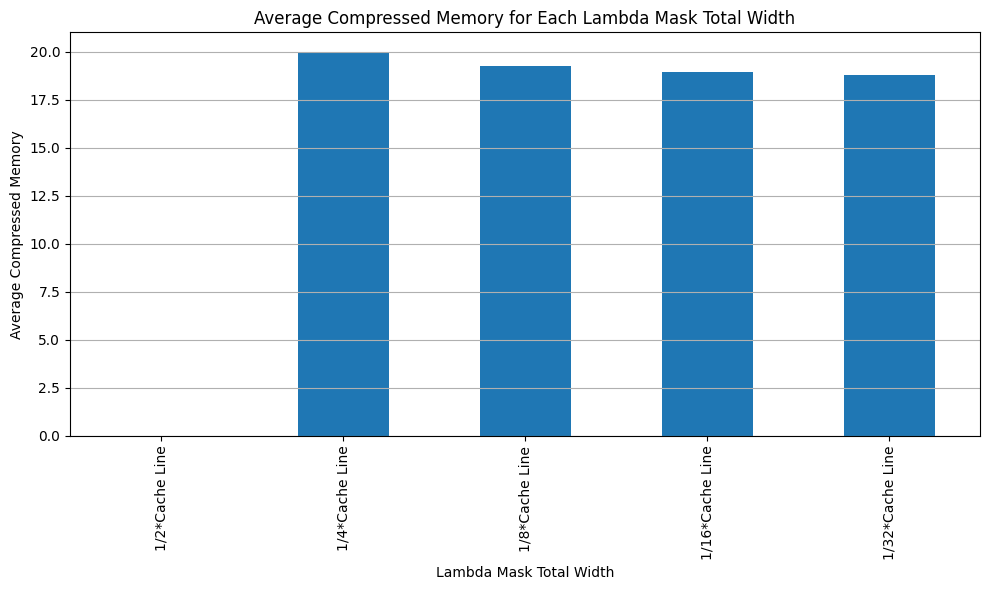

In [85]:
average_compressed_memory = data.groupby('Lambda Mask Total Width')['Compressed Memory'].mean()

# Plot the average compressed memory
plt.figure(figsize=(10, 6))
average_compressed_memory.plot(kind='bar')

# Adding labels and title
plt.title('Average Compressed Memory for Each Lambda Mask Total Width')
plt.xlabel('Lambda Mask Total Width')
plt.ylabel('Average Compressed Memory')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()




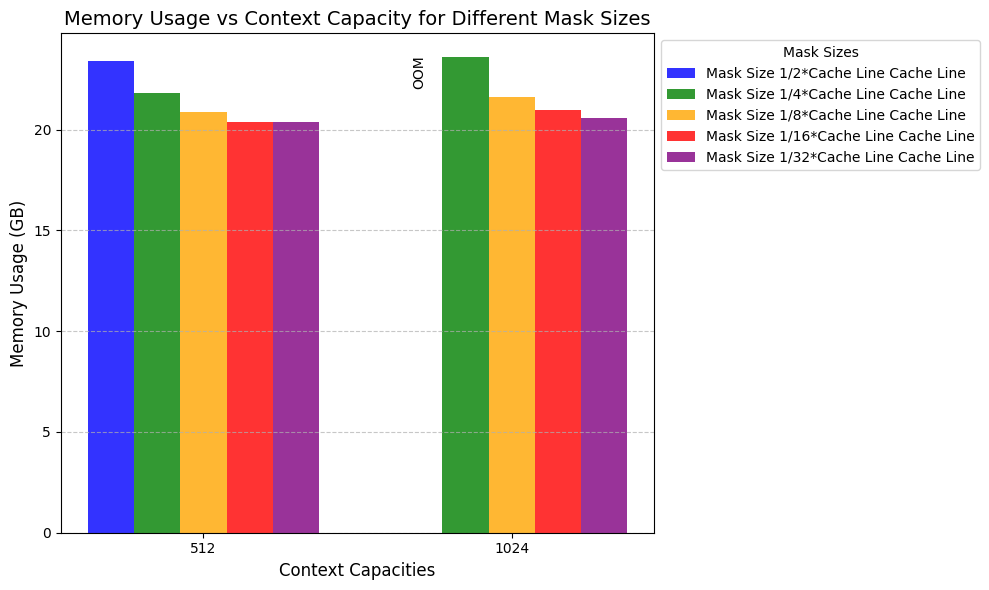

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the graph
mask_sizes = ["1/2*Cache Line", "1/4*Cache Line", "1/8*Cache Line", "1/16*Cache Line", "1/32*Cache Line"]
context_capacities = [512, 1024]
oom_cases = {
    "1/2*Cache Line": [23.4, "OOM"],
    "1/4*Cache Line": [21.8, 23.6],
    "1/8*Cache Line": [20.9, 21.6],
    "1/16*Cache Line": [20.4, 21],
    "1/32*Cache Line": [20.4, 20.6],
}

# Prepare data for plotting
x = np.arange(len(context_capacities))  # Context capacity positions on X-axis
width = 0.15  # Width of the bars
colors = ["blue", "green", "orange", "red", "purple"]

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, mask_size in enumerate(mask_sizes):
    memory_usage = [
        value if isinstance(value, (float, int)) else 0 for value in oom_cases[mask_size]
    ]
    ax.bar(
        x + i * width,
        memory_usage,
        width,
        label=f"Mask Size {mask_size} Cache Line",
        color=colors[i],
        alpha=0.8,
    )

# Add OOM markers and labels
for i, mask_size in enumerate(mask_sizes):
    for j, value in enumerate(oom_cases[mask_size]):
        if value == "OOM":
            ax.text(
                x[j] + i * width,
                22,  # Arbitrary value above bars
                "OOM",
                ha="center",
                va="bottom",
                fontsize=10,
                color="black",
                rotation=90,
            )

# Formatting the chart
ax.set_xlabel("Context Capacities", fontsize=12)
ax.set_ylabel("Memory Usage (GB)", fontsize=12)
ax.set_title("Memory Usage vs Context Capacity for Different Mask Sizes", fontsize=14)
ax.set_xticks(x + width * (len(mask_sizes) - 1) / 2)
ax.set_xticklabels(context_capacities)
ax.legend(title="Mask Sizes", fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


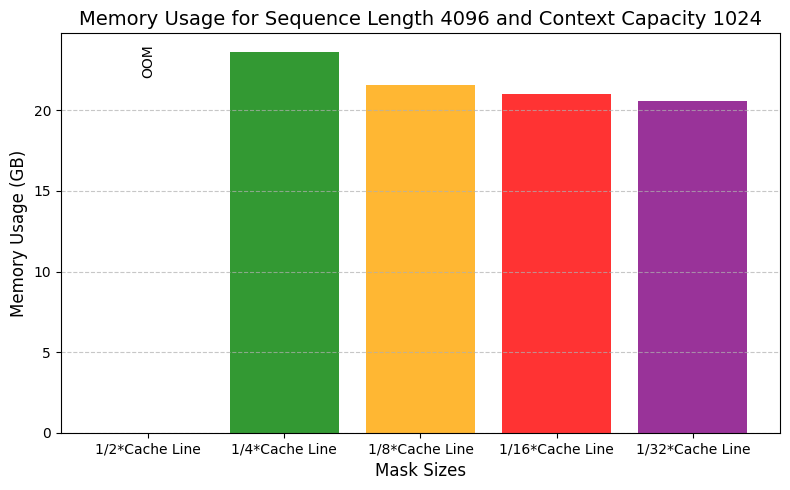

In [74]:
# Filter data to only include context capacity 1024
context_capacity = 1024

# Extract memory usage for context capacity 1024
filtered_oom_cases = {mask: oom_cases[mask][1] for mask in mask_sizes}

# Plotting the filtered data
fig, ax = plt.subplots(figsize=(8, 5))

memory_usage = [
    value if isinstance(value, (float, int)) else 0 for value in filtered_oom_cases.values()
]
bar_positions = np.arange(len(mask_sizes))

ax.bar(
    bar_positions,
    memory_usage,
    color=colors,
    alpha=0.8,
    tick_label=mask_sizes
)

# Add OOM markers and labels
for i, value in enumerate(filtered_oom_cases.values()):
    if value == "OOM":
        ax.text(
            bar_positions[i],
            22,  # Arbitrary value above bars
            "OOM",
            ha="center",
            va="bottom",
            fontsize=10,
            color="black",
            rotation=90,
        )

# Formatting the chart
ax.set_xlabel("Mask Sizes", fontsize=12)
ax.set_ylabel("Memory Usage (GB)", fontsize=12)
ax.set_title(f"Memory Usage for Sequence Length 4096 and Context Capacity {context_capacity}", fontsize=14)
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()
